In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import accuracy_score,RocCurveDisplay,confusion_matrix
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

In [13]:
data = pd.read_csv('./heart attack classification.csv')
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [15]:
data.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [16]:
x = data.iloc[:,:-1].values

In [17]:
y = data.iloc[:,-1].values

In [18]:
sc = StandardScaler()

In [19]:
x = sc.fit_transform(x)

In [20]:
models ={
    "LogisticRegression":LogisticRegression(),
    "DecisionTreeClassifier":DecisionTreeClassifier(),
    "RandomForestClassifier":RandomForestClassifier(),
    "AdaBoostClassifier":AdaBoostClassifier(),
    "GradientBoostingClassifier":GradientBoostingClassifier(),
    "KNeighborsClassifier":KNeighborsClassifier()
}

In [23]:
for name,model in models.items():
    scores = cross_val_score(model,x,y,scoring="accuracy",cv=10,n_jobs=-1)
    print("cross validation model:{}".format(name))
    print("mean score:",np.mean(scores)*100)
    print("*"*100)

cross validation model:LogisticRegression
mean score: 81.16129032258065
****************************************************************************************************
cross validation model:DecisionTreeClassifier
mean score: 75.50537634408603
****************************************************************************************************
cross validation model:RandomForestClassifier
mean score: 80.80645161290322
****************************************************************************************************
cross validation model:AdaBoostClassifier
mean score: 81.12903225806451
****************************************************************************************************
cross validation model:GradientBoostingClassifier
mean score: 80.13978494623656
****************************************************************************************************
cross validation model:KNeighborsClassifier
mean score: 81.83870967741936
*********************************************

### selecting KNeighborsClassifier

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [25]:
model = KNeighborsClassifier()

In [26]:
model.fit(x_train,y_train)
print("Model terained with KNeighbours classifier")
score_train = accuracy_score(y_train,model.predict(x_train))
score_test = accuracy_score(y_test,model.predict(x_test))
con_train = confusion_matrix(y_train,model.predict(x_train))
con_test = confusion_matrix(y_test,model.predict(x_test))
print("Model accuracy on train is:",score_train)
print("Model accuracy on test is :",score_test)
print("confusion_matrix train is:",con_train)
print("Confusion_matrix test is",con_test)
print("wrong predictions made:",((y_test !=model.predict(x_test)).sum(),'/',
                                 ((y_test == model.predict(x_test)).sum()+
                                  (y_test != model.predict(x_test)).sum())))

Model terained with KNeighbours classifier
Model accuracy on train is: 0.8677685950413223
Model accuracy on test is : 0.819672131147541
confusion_matrix train is: [[ 92  19]
 [ 13 118]]
Confusion_matrix test is [[21  6]
 [ 5 29]]
wrong predictions made: (11, '/', 61)


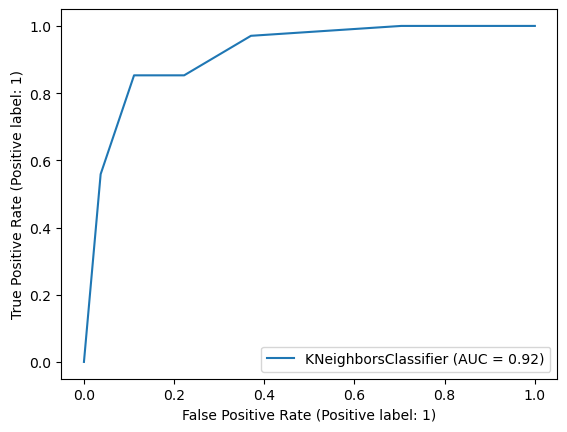

In [27]:
ROC_display = RocCurveDisplay.from_estimator(model,x_test,y_test)